-

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... report platform
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

import platform; print platform.platform()

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... load packages
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

import os
from os import path

import sys; print "Python", sys.version
reload(sys)
sys.setdefaultencoding('utf8')

import timeit
import time
import re; print "re", re.__version__

import numpy as np
import pandas as pd
import statistics

import warnings
warnings.filterwarnings("ignore")

import string
import unicodedata
import pattern
import collections

from tabulate import tabulate

from tqdm import tqdm

import nltk; print "nltk", nltk.__version__
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import ConditionalFreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig

import mglearn; print "mglearn", mglearn.__version__

from PIL import Image
from wordcloud import WordCloud,STOPWORDS

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... add plot utilities
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn-whitegrid')

rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... support importing other ipynb notebooks
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

import import_ipynb

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... set some options
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

%pylab
%matplotlib inline
pd.set_option('max_colwidth',400)


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... include some local utility functions 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def printf(format, *args):
    sys.stdout.write(format % args)

def min_word_length(text, min_length = 2):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if len(token) > min_length]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# ref : https://stackoverflow.com/questions/3861674/split-string-by-number-of-words-with-python
def group_words(s, n):
    words = s.split()
    for i in xrange(0, len(words), n):
        yield ' '.join(words[i:i+n])

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... character cleaning functions
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def clean_text(start_text) :
    text = [re.sub('^((?![a-zA-Z ]).)*$', '', x) for x in start_text]
    text = [re.sub('_', '', x) for x in text]
    text = [x.lower() for x in text]
    text = [x for x in text if x != '']
    return text


def remove_non_ascii(text):
    L = [32, 44, 46, 65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,
         90,97,98,99,100,101,102,103, 104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,
         120,121,122]
    text = str(text)
    return ''.join(i for i in text if ord(i) in L)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... print topic features
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

def selected_topics(model, vectorizer, top_n=10):
    
    for idx, topic in enumerate(model.components_):
        
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... import Sarkar functions : https://github.com/dipanjanS/text-analytics-with-python
# ...
# ... (functions modified locally for specific functionality updates)
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

from normalization_ameliorer import *
from featurizer import *
from cluster_utilities import *

import normalization_ameliorer
import featurizer
import cluster_utilities

reload (normalization_ameliorer)
reload (featurizer)
reload (cluster_utilities)


# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... declare some directory locations
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

file_mask = ".*\.txt"

home_dir = "/home/mcdevitt/_ds/_smu/_src/nlp/homework_08/"
corpus_dir = "./corpus/"
corpus_clean = "./corpus_no_license/"

plot_dir = "./plots/"

os.chdir(home_dir)


In [264]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... read in text with gutenberg license removed / assemble corpus for evaluation
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

readers = PlaintextCorpusReader(corpus_clean, file_mask)

bookname = readers.fileids()
bookname[0:10]

['a_christmas_carol_by_charles_dickens.txt',
 'a_christmas_carol_in_prose;_being_a_ghost_story_of_christmas_by_charles_dickens.txt',
 "a_doll's_house_:_a_play_by_henrik_ibsen.txt",
 'a_history_of_aeronautics_by_w._lockwood_marsh_and_evelyn_charles_vivian.txt',
 'a_modest_proposal_by_jonathan_swift.txt',
 'a_plain_and_literal_translation_of_the_arabian_nights_entertainments,_now.txt',
 'a_study_in_scarlet_by_arthur_conan_doyle.txt',
 'a_tale_of_two_cities_by_charles_dickens.txt',
 'adventures_of_huckleberry_finn_by_mark_twain.txt',
 "alice's_adventures_in_wonderland_by_lewis_carroll.txt"]

In [265]:
readers.raw(bookname[0])

u' A CHRISTMAS CAROL ***\r\n\r\n\r\n\r\n\r\nProduced by Jason Isbell and the Online Distributed\r\nProofreading Team at http://www.pgdp.net\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nA CHRISTMAS CAROL\r\n\r\nBy CHARLES DICKENS\r\n\r\nILLUSTRATED BY\r\nGEORGE ALFRED WILLIAMS\r\n\r\nNew York\r\nTHE PLATT & PECK CO.\r\n\r\n_Copyright, 1905, by_ THE BAKER & TAYLOR COMPANY\r\n\r\n[Illustration: "He had been Tim\'s blood horse all the way from church."]\r\n\r\n\r\n\r\n\r\nINTRODUCTION\r\n\r\n\r\nThe combined qualities of the realist and the idealist which Dickens\r\npossessed to a remarkable degree, together with his naturally jovial\r\nattitude toward life in general, seem to have given him a remarkably\r\nhappy feeling toward Christmas, though the privations and hardships of\r\nhis boyhood could have allowed him but little real experience with this\r\nday of days.\r\n\r\nDickens gave his first formal expression to his Christmas thoughts in\r\nhis series of small books, the first of which was the famou

In [ ]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... create table for collecting results
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_book  = pd.DataFrame(columns = [
    'title',
    'length',
    'text'])

i_index=[]
i_index = 0

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

for fileid in readers.fileids():
    rtxt = readers.raw(fileid)
    
    dict_this = {'title' : fileid,
        'length' : len(rtxt),
        'text' : rtxt}
    df_this = pd.DataFrame(dict_this, index = [i_index + 1])
    df_book = df_book.append(df_this)
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... reset index of data frame 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_book.reset_index(drop = True, inplace = True)

In [215]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... save data frame for later recall 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_book.to_pickle('df_book.pkl')

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... recover books data frame 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_book = pd.read_pickle('df_book.pkl')

sum(df_book['length'])

df_book.head()
df_book.tail()


In [ ]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... collector table for chunks of books
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_chunk  = pd.DataFrame(columns = [
    'title',
    'chunk',
    'length',
    'text'])

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... collector table for processing info during normalization
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_norm  = pd.DataFrame(columns = [
    'title',
    'len_start',
    'len_end',
    'time',
    'ratio',
    'rate',
    'clock_time',
    'process_times'])

i_index=[]
i_index = 0

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... just to make sure stopword list has no duplicates
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

stopword_set = list(set(stopword_list))

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... set some initial conditions prior to normalization 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_select = df_book

normalized_corpus = []

itxt = 0
i_index = 0

chunk_size = 2000

In [122]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... normalization 
# ...
# ... this section of code requires ~2 hours process time on
# ...    intel i5 @ 1.7Ghzx4, linux ubuntu 16.04lts
# ...              !!!!!!!!!!!!!!!!!!!
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

for text, title in zip(df_select['text'], df_select['title']) :
    
    printf("\n\n%40s\n", title)

    start_time = timeit.default_timer()
    txt_start = len(text)
    
# expand contractions

    text = expand_contractions(text, CONTRACTION_MAP)
    
    t1 = timeit.default_timer() - start_time
    s1 = len(text)
    
# ... pos tag, then downselect to only NOUNs

    pos_tagged_text = pos_tag_text(text)
    t2 = timeit.default_timer() - start_time
    
    pos_selected_tokens = [word if (pos_tag == 'n') else '.'
                            for word, pos_tag in pos_tagged_text]    
    t3 = timeit.default_timer() - start_time

    s2 = len(pos_selected_tokens)

# ... lemmatize

    lemmatized_tokens = [wnl.lemmatize(word, 'n')                     
                             for word in pos_selected_tokens]
    
    s3 = len(lemmatized_tokens)
    
    lemmatized_text = ' '.join(lemmatized_tokens)
    t4 = timeit.default_timer() - start_time
    s4 = len(lemmatized_text)
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# .. chunk each text into multiple same-sized chunks of chunk_size
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

    chunks = list(group_words(lemmatized_text, chunk_size))
    ichunk = 0
    
    for chunk in chunks :
        
# .. remove special characters
    
        text = remove_special_characters(chunk)

# .. remove 1 and 2 letter tokens

        text = min_word_length(text)
        
# .. remove stop words
# ... ref : https://stackoverflow.com/questions/19560498/faster-way-to-remove-stop-words-in-python/19560841

        pattern = re.compile(r'\b(' + r'|'.join(stopword_set) + r')\b\s*')
        text = pattern.sub('', text)

        dict_this = {'title' : title,
                     'chunk' : ichunk,
                     'length' : len(text),
                     'text' : text}
        
        df_this = pd.DataFrame(dict_this, index = [i_index + 1])
        df_chunk = df_chunk.append(df_this)
        ichunk = ichunk + 1
        
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... add next chunk to normalized corpus ... 
# ...     ---> this is the corpus for topic model
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

        normalized_corpus.append(text)

    t5 = timeit.default_timer() - start_time
    s5 = len(text)

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... store some information about processing times, text lengths
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

    elapsed = timeit.default_timer() - start_time
    
    printf("%d | %d\n", len(pos_selected_tokens), len(lemmatized_tokens))
    printf(4*"%7d | " + "%7d\n", s1, s2, s3, s4, s5)
    
    printf("%3d : %8d | %8d | %.1f | %.2f | %.1f | ",
               itxt, txt_start, txt_end, (float(txt_end)/float(txt_start)*100.0),
               elapsed, len(text) / elapsed)
    itxt = itxt + 1

    now = time.time()
    printf ("%02d:%02d:%02d |",
                         time.localtime(now).tm_hour,
                         time.localtime(now).tm_min,
                         time.localtime(now).tm_sec)
    printf(4*"%.1f, " + "%.1f", t1, t2-t1, t3-t2, t4-t3, t5-t4)
    print "\n"
    print '-'*80
    
    clock_time = "%02d:%02d:%02d |" % (time.localtime(now).tm_hour,
                             time.localtime(now).tm_min,
                             time.localtime(now).tm_sec)
    process_times = "%.1f, %.1f, %.1f, %.1f, %.1f" % (t1, t2-t1, t3-t2, t4-t3, t5-t4)
    
    dict_this = {'title' : title,
                'len_start' : txt_start,
                'len_end' : txt_end,
                'time' : elapsed,
                'ratio' : float(txt_end)/float(txt_start),
                'rate' : len(text) / elapsed,
                'clock_time' : clock_time,
                'process_times' : process_times}
    
    df_this = pd.DataFrame(dict_this, index = [i_index + 1])
    df_norm = df_norm.append(df_this)
    
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
    
print '~'*80

df_norm

In [125]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... save chunked data frame & normalized corpus list for later recall 
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

df_chunk.to_pickle('df_chunk.pkl')

with open('normalized_corpus', 'wb') as fp:
    pickle.dump(normalized_corpus, fp)

df_chunk

,chunk,length,text,title
1,0,2624,christmas isbell online proofreading team http www pgdp net christmas dickens york platt peck copyright baker company illustration tims blood horse church introduction quality realist idealist dickens degree attitude life feeling christmas privation hardship boyhood experience day day dickens expression christmas series book christmas chrysolite success book thackeray objection book benefit wo...,a_christmas_carol_by_charles_dickens.txt
1,1,1890,eye clerk cell sort tank letter fire clerk fire coal coal box room clerk shovel master wherefore clerk comforter candle effort imagination christmas uncle god voice voice nephew intimation approach walking fog frost nephew glow face eye breath christmas humbug uncle nephew christmas reason nephew reason answer spur uncle nephew illustration christmas uncle god voice uncle world fool christmas ...,a_christmas_carol_by_charles_dickens.txt
1,2,2461,head cold street corner court labourer gas pipes fire brazier round party men boy hand eye blaze rapture water plug solitude overflowings ice brightness shop sprig lamp heat window pale poulterer grocer trade joke pageant principle bargain sale lord mayor stronghold mansion house order cook butler christmas lord mayor household shilling monday street morrows pudding wife baby beef foggier duns...,a_christmas_carol_by_charles_dickens.txt
1,3,1886,sound house minute minute hour noise person chain cask wine merchant cellar ghost house chain cellar door sound noise floor stair door colour pause door room eye flame marley ghost face marley pigtail waistcoat tights boot tassel pigtail coat skirts hair head chain middle tail cash boxes key padlock ledger deed purse steel body waistcoat button coat marley bowel influence eye texture kerchief ...,a_christmas_carol_by_charles_dickens.txt
1,4,1807,business chain arm length cause grief ground time year spectre crowd fellow beings eye wise men abode light spectre rate quake ghost time pray shape day idea perspiration brow penance ghost fate procuring friend ghost spirit countenance ghost voice visit ghost path toll night hour night stroke twelve sake word spectre wrapper table head sound teeth jaw bandage eye visitor attitude chain arm ap...,a_christmas_carol_by_charles_dickens.txt
1,5,1945,arm steadiness quality belt instant time figure distinctness arm leg leg pair leg head head body outline gloom wonder spirit sir voice distance ghost christmas past past stature past anybody anybody spirit cap ghost hand light passion cap train year brow intention knowledge spirit period life business welfare ghost night rest end spirit thinking reclamation heed hand arm rise weather hour purp...,a_christmas_carol_by_charles_dickens.txt
1,6,1833,ghost hand christmas self word room panel window fragment plaster ceiling lath boy holiday ghost head door girl boy arm neck brother brother child hand laugh fan boy child glee father heaven night bed coach child eye christmas time world woman fan boy hand head eagerness door voice hall master box hall schoolmaster master condescension state mind hand sister parlour map wall globe window decan...,a_christmas_carol_by_charles_dickens.txt
1,7,1517,time dance advance hand partner bow curtsy thread needle place wink leg foot clock ball station side door hand person christmas everybody prentice voice lad bed shop time wit heart soul self agitation self ghost light head matter ghost folk gratitude spirit apprentice heart praise pound money praise remark speaking self spirit power service light pleasure toil power word happiness fortune spir...,a_christmas_carol_by_charles_dickens.txt
1,8,2200,despoil parcel tight cravat hug neck leg affection wonder delight development package announcement baby doll mouth suspected turkey immense relief alarm gratitude ecstasy degree child emotion parlour stair time top house bed master house daughter mother fireside creature promise father time life sight husband wife smile friend afternoon guess tut breath office win

In [126]:

#df_chunk = pd.read_pickle('df_chunk.pkl')

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... recall normalized corpus from disk
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

with open ('normalized_corpus', 'rb') as fp:
    normalized_corpus = pickle.load(fp)

len(normalized_corpus)
normalized_corpus[0:2]

7597

list

[u'christmas isbell online proofreading team http www pgdp net christmas dickens york platt peck copyright baker company illustration tims blood horse church introduction quality realist idealist dickens degree attitude life feeling christmas privation hardship boyhood experience day day dickens expression christmas series book christmas chrysolite success book thackeray objection book benefit woman kindness volume manner illustration leech artist character drawing chime cricket hearth battle life illustration appearance maclise day christmas book cricket hearth series point popularity american characterisation plummer dickens self ghost christmas charm lesson meaning movement spirit life window head fog mist cold piping blood light heavenly sky air brightness shadow heart note pathos toast god cricket note cricket feeling action crisis fate fortune carrier wife gift characterization writer shakespeare character caricature dickens power creation dickens character right caricature satir

In [127]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... build feature matrix from normalized corpus
# ...
# ... this builds 2 sets ... one based on token counts, 2nd based on tfidf
# ... later analysis shows not much difference for this data set,
# ... so the basic counts is retained for this topic model
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

start_time = timeit.default_timer()

min_df = 0.1
max_df = 0.5
ngram_range = (1, 1)

vector_count = CountVectorizer(binary = False, min_df = min_df,
                                     max_df = max_df, ngram_range = ngram_range)

vector_tfidf = TfidfVectorizer(min_df = min_df, max_df = max_df, 
                                     ngram_range = ngram_range)

feature_matrix_count = vector_count.fit_transform(normalized_corpus).astype(float)
feature_matrix_tfidf = vector_tfidf.fit_transform(normalized_corpus).astype(float)

feature_names_count = vector_count.get_feature_names()
feature_names_tfidf = vector_tfidf.get_feature_names()

elapsed = timeit.default_timer() - start_time
print elapsed



In [152]:

# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... Topic Model --- Latent Dirichlet Allocation Model
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

NUM_TOPICS = 9

In [ ]:
%%time

lda = LatentDirichletAllocation(n_components = NUM_TOPICS,
                                max_iter = 100,
                                learning_method = 'online',
                                verbose = True)

data_lda_tfidf = lda.fit_transform(feature_matrix_tfidf)
data_lda_count = lda.fit_transform(feature_matrix_count)

In [153]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... keywords for topics clustered by Latent Dirichlet Allocation
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

print("LDA Model (tfidf):")
selected_topics(lda, vector_tfidf)

print("LDA Model (count):")
selected_topics(lda, vector_count)

In [155]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... Check perplexity
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

data_lda_tfidf_prplx = lda.perplexity(feature_matrix_tfidf)
data_lda_count_prplx = lda.perplexity(feature_matrix_count)

data_lda_tfidf_prplx
data_lda_count_prplx

691.5923216210865

197.25981486397572

****

### Visualizing LDA results with pyLDAvis

***

1. Topics are on the left while keywords are displayed on the right
2. More prevalent topics are identified with larger topic circles
3. The spatial relationship (distance) between topics indicates relative similarity / dissimilarity
4. Keywords are displayed in descending order of relevance to the selected topic
5. lamba value for relevance includes / excludes words with increasing / decreasing generalizabilty to other topcis
    - low lamba values : words are specific to selected topic
    - higher lambda value : words are associated to more (all) topics


In [161]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... Visualization with term COUNTS model
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

pyLDAvis.enable_notebook()

dash = pyLDAvis.sklearn.prepare(lda, feature_matrix_count, vector_count, mds = 'tsne')

dash

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
4      21.786282        1       1    8.907076   91.631546
5      16.018051        1       2  148.111908  -68.791275
7      15.002344        1       3  155.859100   62.418484
8      14.653898        1       4   45.681103   -6.322057
6      12.159387        1       5 -116.438728   92.520256
3       7.828050        1       6  -82.517586  -27.061857
2       7.037778        1       7    9.654268 -120.763344
0       3.031767        1       8  102.708580  174.781326
1       2.482442        1       9  -32.927315  203.083786, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
253   Default  12873.000000         sir  12873.000000  30.0000  30.0000
160   Default  16052.000000        lord  16052.000000  29.0000  29.0000
119   Default  13839.000000         god  13839.000000  28.0000  28.0000
95    Default  10514.000000      father  10514.000000  27.0000  27.0000
133   Default   4354.000000       horse   4354.000000  26.0000  26.0000
296   Default   3485.000000         war   3485.000000  25.0000  25.0000
232   Default   7467.000000        room   7467.000000  24.0000  24.0000
148   Default   4905.000000        land   4905.000000  23.0000  23.0000
236   Default   3821.000000         sea   3821.000000  22.0000  22.0000
269   Default   6155.000000       state   6155.000000  21.0000  21.0000
36    Default   9040.000000       child   9040.000000  20.0000  20.0000
9     Default   5386.000000         arm   5386.000000  19.0000  19.0000
304   Default   8728.000000       woman   8728.000000  18.0000  18.0000
297   Default   4822.000000       water   4822.000000  17.0000  17.0000
299   Default   5344.000000        wife   5344.000000  16.0000  16.0000
214   Default   6955.000000       power   6955.000000  15.0000  15.0000
10    Default   2225.000000        army   2225.000000  14.0000  14.0000
195   Default   2213.000000     officer   2213.000000  13.0000  13.0000
259   Default   2111.000000     soldier   2111.000000  12.0000  12.0000
246   Default   2695.000000        ship   2695.000000  11.0000  11.0000
179   Default   6366.000000      mother   6366.000000  10.0000  10.0000
121   Default   3585.000000  government   3585.000000   9.0000   9.0000
188   Default   8872.000000       night   8872.000000   8.0000   8.0000
39    Default   3931.000000        city   3931.000000   7.0000   7.0000
27    Default   2770.000000     captain   2770.000000   6.0000   6.0000
262   Default   5174.000000        soul   5174.000000   5.0000   5.0000
58    Default   3547.000000    daughter   3547.000000   4.0000   4.0000
309   Default   8429.000000        year   8429.000000   3.0000   3.0000
25    Default   5778.000000     brother   5778.000000   2.0000   2.0000
198   Default   3880.000000       order   3880.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
30     Topic9    116.334700       cause   2636.144509   0.5753  -5.1462
201    Topic9     91.526226       party   2124.480232   0.5513  -5.3860
190    Topic9     65.487880        note   1620.860664   0.4871  -5.7208
132    Topic9     90.410509      honour   2258.960642   0.4776  -5.3983
51     Topic9    174.791576     country   4368.234288   0.4774  -4.7391
174    Topic9     72.654453        mine   2038.657935   0.3616  -5.6170
189    Topic9     36.922186       noise   1076.314262   0.3234  -6.2939
9      Topic9    184.452725         arm   5386.263729   0.3217  -4.6853
242    Topic9     70.118320     service   2059.352171   0.3160  -5.6525
163    Topic9    125.330277      manner   3745.993237   0.2984  -5.0717
162    Topic9     38.897477         lot   1188.353520   0.2765  -6.2417
194    Topic9     51.611937      office   1602.838302   0.2601  -5.9589
101    Topic9     78.560492       field   2474.645603   0.2459  -5.5388
16     

In [266]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... Visualization with term TF-IDF model
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

pyLDAvis.enable_notebook()

dash = pyLDAvis.sklearn.prepare(lda, feature_matrix_tfidf, vector_tfidf, mds = 'tsne')

dash

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
4      26.905708        1       1  -79.777832   12.932406
7      16.087248        1       2 -172.734772   48.293171
8      14.543870        1       3   67.294174  -43.043003
5      13.133410        1       4   21.541710   49.273617
6      10.061921        1       5  -34.989555  -61.337078
2       6.715054        1       6   16.019897 -145.809891
3       5.895792        1       7 -159.148544  -59.801132
0       3.729329        1       8  -67.790855  111.656654
1       2.927667        1       9  -98.814049 -143.327225, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
253   Default  836.000000         sir  836.000000  30.0000  30.0000
160   Default  675.000000        lord  675.000000  29.0000  29.0000
119   Default  691.000000         god  691.000000  28.0000  28.0000
133   Default  292.000000       horse  292.000000  27.0000  27.0000
95    Default  488.000000      father  488.000000  26.0000  26.0000
296   Default  203.000000         war  203.000000  25.0000  25.0000
232   Default  503.000000        room  503.000000  24.0000  24.0000
36    Default  462.000000       child  462.000000  23.0000  23.0000
10    Default  148.000000        army  148.000000  22.0000  22.0000
259   Default  143.000000     soldier  143.000000  21.0000  21.0000
195   Default  146.000000     officer  146.000000  20.0000  20.0000
304   Default  484.000000       woman  484.000000  19.0000  19.0000
148   Default  221.000000        land  221.000000  18.0000  18.0000
9     Default  333.000000         arm  333.000000  17.0000  17.0000
236   Default  199.000000         sea  199.000000  16.0000  16.0000
269   Default  289.000000       state  289.000000  15.0000  15.0000
297   Default  258.000000       water  258.000000  14.0000  14.0000
299   Default  270.000000        wife  270.000000  13.0000  13.0000
214   Default  339.000000       power  339.000000  12.0000  12.0000
179   Default  351.000000      mother  351.000000  11.0000  11.0000
246   Default  141.000000        ship  141.000000  10.0000  10.0000
188   Default  520.000000       night  520.000000   9.0000   9.0000
309   Default  416.000000        year  416.000000   8.0000   8.0000
262   Default  285.000000        soul  285.000000   7.0000   7.0000
121   Default  161.000000  government  161.000000   6.0000   6.0000
39    Default  179.000000        city  179.000000   5.0000   5.0000
27    Default  143.000000     captain  143.000000   4.0000   4.0000
108   Default  294.000000        foot  294.000000   3.0000   3.0000
58    Default  167.000000    daughter  167.000000   2.0000   2.0000
72    Default  393.000000        door  393.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
30     Topic9    7.558745       cause  131.855337   0.6720  -5.1462
278    Topic9   10.748214       table  198.648934   0.6142  -4.7942
51     Topic9   11.356928     country  217.799830   0.5772  -4.7391
201    Topic9    5.946836       party  114.391258   0.5742  -5.3860
132    Topic9    5.874343      honour  117.646654   0.5339  -5.3983
190    Topic9    4.255017        note   96.390990   0.4107  -5.7208
174    Topic9    4.720659        mine  113.983369   0.3469  -5.6170
242    Topic9    4.555876     service  110.786003   0.3398  -5.6525
194    Topic9    3.353440      office   82.602553   0.3269  -5.9589
163    Topic9    8.143224      manner  201.890354   0.3204  -5.0717
167    Topic9    3.658657        mean   92.739540   0.2983  -5.8718
60     Topic9   11.424867       death  300.085347   0.2627  -4.7331
189    Topic9    2.398986       noise   63.432303   0.2560  -6.2939
162    Topic9    2.527329         lot   67.168565   0.2509  -6.2417
154    Topic9    8.038589      letter  219.277636   0.2249  -5.0847
9      Topic9   11.984653         arm  333.423273   0.2

In [255]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... Print each topic and associated Top 10 words
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

sorting = np.argsort(lda.components_)[:,::-1]
features = np.array(vector_count.get_feature_names())

mglearn.tools.print_topics(topics = range(9), feature_names = features,
                            sorting = sorting, topics_per_chunk = 10, n_words = 10)


```
topic 0       topic 1       topic 2       topic 3       topic 4       topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------      --------      --------      --------      --------      --------      
horse         sir           sea           lord          room          state         father        night         god           
war           horse         water         god           face          power         woman         boy           soul          
army          sword         ship          land          girl          law           wife          door          world         
soldier       name          captain       city          door          government    child         arm           heaven        
officer       london        foot          child         woman         case          brother       side          death         
arm           brother       tree          nation        friend        person        mother        round         spirit        
field         battle        year          servant       mother        subject       year          foot          earth         
force         lord          land          battle        gentleman     nature        daughter      light         friend        
order         arm           air           court         table         opinion       master        bed           truth         
road          death         wind          peace         voice         question      family        street        body          
```

(-0.5, 1599.5, 899.5, -0.5)

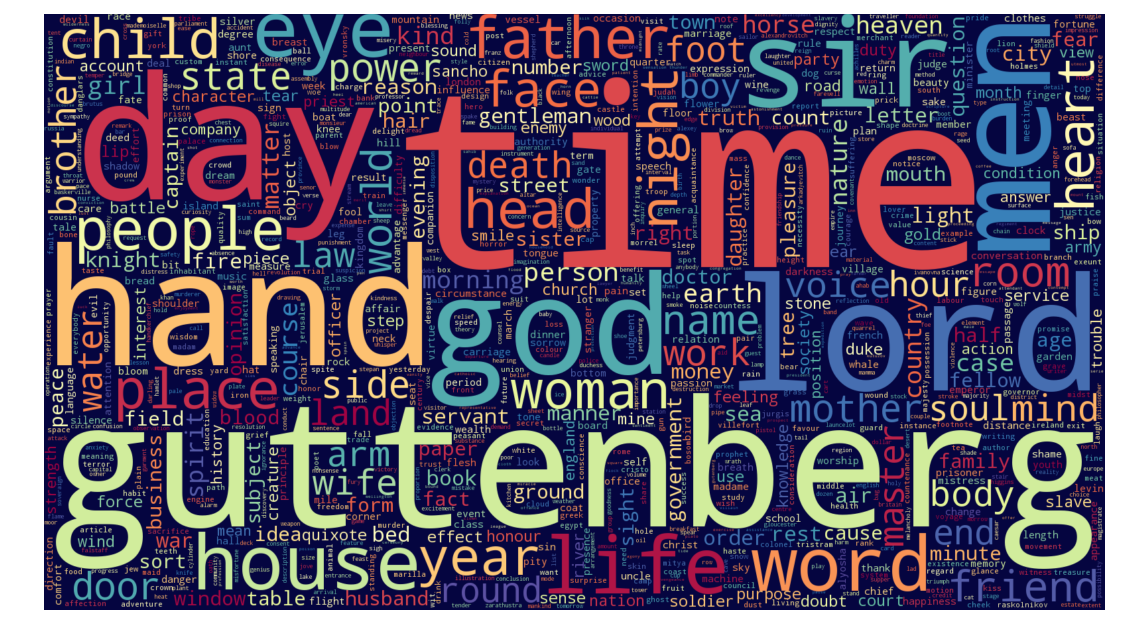

In [252]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... Do the Word Cloud
# ...
# ... for this iteration ... just add in all the tokens in the total
# ... normalized (NOUNs only) corpus
# ...
# ... for future iterations ...
# ...    consider creating word cloud specific for each topic and
# ...    each book, for customer/participant engagment
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

normalized_text = ' '.join(normalized_corpus)

# ... add in a bunch of 'guttenberg's to advertise their site in the cloud

gut1000 = ' '.join(['guttenberg'] * 20000)
wc_text = gut1000 + normalized_text

# ... and the words in the cloud

wc = WordCloud(background_color = "#050540",
               colormap="Spectral",
               width=1600,
               height=900,
               max_words = 1000,
               collocations = False,
#               stopwords = ['hand']
              )

wc.generate(wc_text)

plt.figure(figsize = (16, 9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

savefig('wordcloud.2.png')


In [ ]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... end_of_file
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

In [5]:
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
# ... environment and package versions
# ... -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-

print('\n')
print("_"*70)
print('The environment and package versions :')
print('\n')

import platform
import os
import sys
import pandas as pd
import numpy as np
import bs4
from bs4 import BeautifulSoup
import re
import sklearn
import matplotlib
import mglearn

print(platform.platform())
print('Python', sys.version)
print("pandas version:", pd.__version__)
print('OS', os.name)
print('Numpy', np.__version__)
print('Beautiful Soup', bs4.__version__)
print('Regex', re.__version__)
print('scikit-learn version', sklearn.__version__)
print('matplotlib', matplotlib.__version__)
print("mglearn version:", mglearn.__version__)

print('\n')
print("~"*70)
print('\n')



______________________________________________________________________
The environment and package versions :


Linux-4.15.0-39-generic-x86_64-with-Ubuntu-16.04-xenial
('Python', '2.7.12 (default, Nov 12 2018, 14:36:49) \n[GCC 5.4.0 20160609]')
('pandas version:', u'0.23.0')
('OS', 'posix')
('Numpy', '1.15.4')
('Beautiful Soup', '4.6.3')
('Regex', '2.2.1')
('scikit-learn version', '0.19.0')
('matplotlib', '2.0.2')
('mglearn version:', '0.1.7')


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


